# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [2]:
import cudf
import cuml
import numpy as np
import cupy as cp

## Create high-dimensional dataset

In [29]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=50, random_state=np.random.randint(1e9))

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(50)])
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49
0,0.041045,-10.292640,1.177966,-1.414663,8.241033,9.567411,3.553962,1.284245,-11.168552,-7.020938,...,-3.165452,-1.904541,-1.719124,-7.981952,-7.365884,9.653520,3.520129,-2.637268,-5.470366,6.645054
1,-1.107130,-9.553808,3.025451,-2.190838,8.798642,10.366919,5.056868,1.332000,-9.634288,-8.842068,...,-2.655200,-0.999501,-4.603571,-9.941814,-9.669714,9.226473,3.474322,-3.016164,-3.289551,5.047598
2,1.913321,-6.092017,2.842950,-9.065559,-6.982090,5.009421,-8.959929,-0.895974,-9.100878,-9.163316,...,1.188745,9.619443,5.666514,5.758489,-3.356171,7.564854,8.930353,0.989178,-4.742434,5.760899
3,2.672096,-3.784406,7.022588,-5.444439,4.835794,5.305421,1.340389,4.141407,5.150586,8.920522,...,7.643090,-9.356540,-6.937361,2.654076,6.578782,-3.204956,-5.548830,-4.360249,-2.436038,6.139272
4,2.360255,-5.390627,6.070533,-5.594465,6.115510,6.034058,1.563060,5.955231,5.120157,8.057615,...,7.079655,-9.188068,-7.107814,3.721409,6.104794,-3.953266,-4.642387,-4.384284,-3.194549,5.097012


---

# Dimensionality reduction

---

#### PCA()

In [30]:
pca = cuml.PCA(
    n_components=2
)

In [31]:
pca.fit(df)

PCA(copy=True, handle=<cuml.raft.common.handle.Handle object at 0x7fb7500f6c70>, iterated_power=15, n_components=2, random_state=None, svd_solver='auto', tol=1e-07, verbose=4, whiten=False, output_type='cudf')

<AxesSubplot:xlabel='0', ylabel='1'>

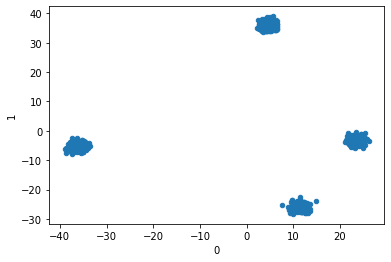

In [32]:
pca.fit_transform(df).to_pandas().plot(kind='scatter', x=0, y=1)

In [33]:
pca.inverse_transform(pca.fit_transform(df))

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.725112,-9.588043,5.038851,-4.872053,3.842266,9.714378,-1.537457,2.549830,-6.991890,-4.673177,...,-0.315739,1.450073,-0.189838,-1.341072,-2.795422,7.964781,4.778957,-3.895780,-6.803757,5.808375
1,0.772591,-9.384712,4.943092,-4.932828,3.644960,9.476523,-1.530872,2.411443,-7.052958,-4.817812,...,-0.302932,1.459326,-0.112179,-1.279587,-2.927255,7.860913,4.776723,-3.732181,-6.617837,5.728395
2,1.712822,-5.475718,2.130891,-6.474120,-2.344845,4.044728,-2.687101,-1.406783,-11.155085,-11.467000,...,-1.637623,4.841012,4.049664,0.223823,-7.849844,7.997010,7.342571,0.998406,-2.811345,3.860308
3,2.071546,-3.329226,6.160923,-5.180347,6.972909,5.992517,4.040334,3.141182,3.397191,7.084309,...,6.702528,-11.689180,-8.981960,-0.795111,3.152833,-4.169516,-6.220767,-5.502997,-2.053860,4.731121
4,1.965170,-3.800935,6.249681,-5.090568,7.128959,6.426331,3.848877,3.303222,3.136725,6.888545,...,6.455700,-11.270643,-8.795589,-0.893611,3.130697,-3.635618,-5.857297,-5.664792,-2.453286,4.871284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.790765,-9.286106,5.068258,-4.896418,3.937378,9.512960,-1.301028,2.548887,-6.565237,-4.204449,...,-0.017407,0.897765,-0.546051,-1.306553,-2.569257,7.433694,4.314717,-3.932958,-6.568702,5.747994
996,4.955929,8.897364,-0.636971,-9.234073,-7.243036,-9.229742,3.062959,-6.419688,-3.409656,-5.754428,...,5.780178,-7.702928,-1.454996,3.246102,-7.331153,-8.131809,-3.562220,6.031754,9.374400,-0.432045
997,1.748463,-5.313700,2.132116,-6.492782,-2.326725,3.923774,-2.579458,-1.424638,-10.970022,-11.273455,...,-1.501229,4.592655,3.898515,0.247162,-7.764272,7.743994,7.132555,1.002215,-2.681735,3.822956
998,0.856873,-9.013056,4.856564,-5.009937,3.484474,9.120045,-1.401944,2.263991,-6.897773,-4.729675,...,-0.135470,1.184307,-0.213416,-1.196488,-2.950621,7.476706,4.534925,-3.577613,-6.299164,5.612314


In [34]:
pca.explained_variance_

0    531.021606
1    469.632111
dtype: float32

In [35]:
pca.explained_variance_ratio_

0    0.388050
1    0.343189
dtype: float32

#### TruncatedSVD()

#### UMAP()

In [36]:
umap = cuml.UMAP(
    n_neighbors=10
    , n_components=2
)

In [37]:
umap.fit(df)

UMAP(n_neighbors=10, n_components=2, n_epochs=0, learning_rate=1.0, min_dist=0.1, spread=1.0, set_op_mix_ratio=1.0, local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, init='spectral', verbose=4, a=1.576943460405378, b=0.8950608781227859, target_n_neighbors=-1, target_weights=0.5, target_metric='categorical', handle=<cuml.raft.common.handle.Handle object at 0x7fb742a56210>, hash_input=False, random_state=1393637605190297794, optim_batch_size=0, callback=None, output_type='cudf')

In [38]:
umap.fit_transform(df)

,0,1
0,10.183125,4.072691
1,10.116483,3.770130
2,-3.144757,9.555979
3,1.890769,-11.296057
4,1.283907,-12.013746
...,...,...
995,9.849273,4.022923
996,-8.671739,-2.531447
997,-3.930853,9.266230
998,8.357706,3.212104


<AxesSubplot:xlabel='0', ylabel='1'>

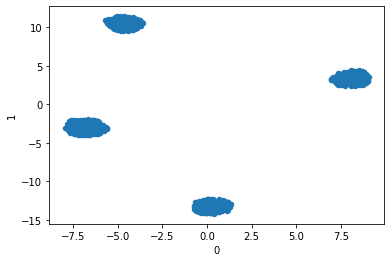

In [39]:
umap.fit_transform(df).to_pandas().plot(kind='scatter', x=0, y=1)

In [40]:
umap.transform(df)

,0,1
0,8.568121,2.468226
1,7.865261,2.236109
2,-4.006587,9.616974
3,-0.519939,-12.914607
4,-0.742726,-13.155347
...,...,...
995,7.136212,4.101074
996,-5.956302,-2.255173
997,-5.533774,9.990584
998,7.439633,4.398200


#### TSNE()

In [41]:
tsne = cuml.TSNE(
    n_components=2
    , perplexity=10
    , learning_rate=200
)

In [42]:
tsne.fit(df)

TSNE(n_components=2, perplexity=10.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1.0000000116860974e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, learning_rate_method='adaptive', n_neighbors=90, perplexity_max_iter=100, exaggeration_iter=250, pre_momentum=0.5, post_momentum=0.800000011920929, handle=<cuml.raft.common.handle.Handle object at 0x7fb74294ae90>)

<AxesSubplot:xlabel='0', ylabel='1'>

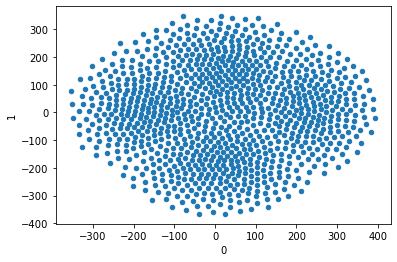

In [50]:
tsne.fit_transform(df).to_pandas().plot(kind='scatter', x=0, y=1)